# Ch. 6: Probability
Notes on "Data Science from Scratch" by Joel Grus

In [1]:
from __future__ import division

import math
import random
from collections import Counter

import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('figure', figsize=(10,7)) # default is (8,6)
mpl.rc('xtick',labelsize =14)
mpl.rc('ytick',labelsize =14)
mpl.rc('axes', labelsize = 16)
mpl.rc('axes', titlesize = 18)
mpl.rc('legend', fontsize = 14)
#mpl.rc('text', usetex=True) # make all tick labels be rendered with latex fonts

Think of probability as a way of quantifying the uncertainty associated with *events* chosen from some *universe* of events.

In the example of rolling a die, the *universe* consists of all possible outcomes and any subset of these outcomes is an *event*: "the die rolls a one" or "the die rolls an even number."

Let $P(E) = $ the probability of the event $E$.

## Dependence and Independence

- *dependent*: knowing something about whether $E$ happens gives us info about whether $F$ happens (and vice versa); e.g., knowing that we flipped "heads" on a fair coin gives us info on whether both flips are "tails"
- *independent*: otherwise; e.g., knowing that we flipped "heads" on a fair coin gives no info about whether the second flip is "heads"

## Conditional Probability
When two events $E$ and $F$ are independent then
$$P(E,F) = P(E) * P(F)$$

If they are not necessarily independent (and if $P(F)\neq 0$) then
$$P(E|F) = \frac{P(E,F)}{P(F)}$$

If they are independent then
$$P(E|F) = P(E)$$


### Example
In a family with two (unknown) children, assume that
1. Each child is equally likely to be a boy or a girl
2. The gender of the second child is independent of the gender of the first child

**Q:** What is the probability of the event "both children are girls" (GG) conditional on the event "the older child is a girl" (OG)?

First, think about the probabilities of various events:
- the probability of the older child being a girl or a boy is $P(OG) = P(OB) = 1/2$
- the probability of the younger child being a girl or a boy is $P(YG) = P(YB) = 1/2$
- the probability of no child being a girl is the same as the probability that both are boys, $P(NG) = P(BB) = P(OB) * P(YB) = 1/2 * 1/2 = 1/4$
- the probability of at least one child being a girl is $P(LG) = 1 - P(NG) = 3/4$
- the probability of girl followed by boy is $P(GB) = P(OG) * P(YB) = 1/2 * 1/2 = 1/4$
- the probability of boy followed by girl is $P(BG) = P(OB) * P(YG) = 1/2 * 1/2 = 1/4$
- the probability of a girl and a boy is $P(GB) + P(BG) = 1/4 + 1/4 = 1/2$
- the probability of both children being girls is $P(GG) = P(OG) * P(YG) = P(YG) * P(OG) = 1/4$

Then
$$P(GG|OG) = \frac{P(GG,OG)}{P(OG)} = \frac{P(GG)}{P(OG)} = \frac{1/4}{1/2} = 1/2$$.

In other words,
$$P(GG|OG) = \frac{P(G) * P(G)}{P(G)} = P(G) = 1/2$$.

**Q:** What is the probability of the event "both children are girls" conditional on the event "at least one of the children is a girl" (LG)?

The joint probability of both girls and at least one girl is the same as the probability of both girls, $P(BG,LG) = P(BG) = 1/4$.  Then
$$P(GG|LG) = \frac{P(GG, LG)}{P(LG)} = \frac{P(GG)}{P(LG)} = \frac{1/4}{3/4} = 1/3$$.

Let's check by "generating" a lot of families:

In [2]:
def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0.0
older_girl = 0.0
either_girl = 0.0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1
        
print "P(both | older):",  both_girls / older_girl   # 0.514 ~ 1/2
print "P(both | either):", both_girls / either_girl  # 0.342 ~ 1/3

P(both | older): 0.514228456914
P(both | either): 0.341541328364


## Bayes's Theorem
Bayes's Theorem is a way of "reversing" conditional probabilities.  Let's say we need to know the probability of some event $E$ conditional on some other event $F$ occuring.  We only have information about the probability of $F$ conditional on $E$ occurring, $P(F|E) = P(F,E)/P(E)$.  Then
$$P(E|F) = \frac{P(E,F)}{P(F)} = \frac{P(F|E) * P(E)}{P(F)}$$.

The event $F$ can be split in the two mutually exclusive events "$F$ and $E$" $P(F,E)$ and "$F$ not $E$" $P(F,!E)$ such that
$$P(F) = P(F,E) + P(F,!E) = P(F|E) * P(E) + P(F|!E) * P(!E)$$.

Then, Bayes's Theorem can be written
$$P(E|F) = \frac{P(F|E) * P(E)}{P(F|E) * P(E) + P(F|!E) * P(!E)}$$.

### Example
Imagine a certain disease that affects 1 in every 10,000 people.  There is a test for this disease that gives the correct result 99% of the time.  Let's define
- the probability of a person having the disease is $P(D) = 0.0001$
- the probability of a person not having the disease is $P(!D) = 0.9999$
- the probability of a positive result if the person has the disease is $P(+|D) = 0.99$
- the probability of a positive result if the person does not have the disease is $P(+|!D) = 0.01$
- the probability that the test result is positive is $P(+) = P(+|D)\,P(D) + P(+|!D)\,P(!D)$

**Q.** What is the probability that you have the disease if your test was positive?

$$
\begin{align}
  P(D|+) &= \frac{P(+|D)\,P(D)}{P(+|D)\,P(D) + P(+|!D)\,P(!D)} \\
         &= \frac{0.99 * 0.0001}{0.99 * 0.0001 + 0.01 * 0.9999}
\end{align}
$$




In [3]:
round((0.99*0.0001) / (0.99*0.0001 + 0.01*0.9999), 4)

0.0098

The probability that you have the disease of your test was positive is less than $1%$!

*Caveat*: This assumes that you people take the test at random.  If only people with certain symptoms take the test we would have to condition on the event "positive test **and** symptoms" and the number would likely be a lot higher.

*Intuition*: Imagine a population of 1 million people. You'd expect 100 of them to have the disease, and 99 of those 100 to test positive.  You'd expect 99,900 of them not to have the disease, and 9,999 would test positive.  So, you'd expect only 99 out of (99 + 9999) positive testers to actually have the disease.

*My Thoughts*: Does the test for the disease give the correct result 99% of the time if given to the same person who **has** symptoms?  In other words, how was this number obtained?  If that is the case, then the calculation seems to necessitate a random population of **symptomatic** people.  Weird.

## Random Variables
A *random variable* is a variable whose possible values have an associated probability distribution.

## Continuous Distributions

In [4]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

def uniform_cdf(x):
    """returns the probability that uniform random variable is <= x"""
    if x < 0:   return 0  # uniform random is never less than 0
    elif x < 1: return x  # e.g., P(X <= 0.4) = 0.4
    else:       return 1  # uniform random is always less than 1

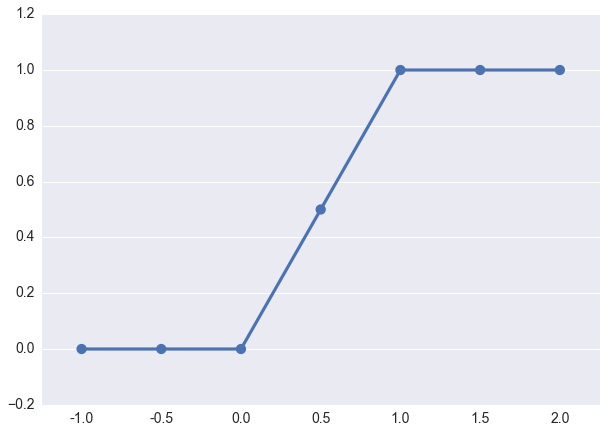

In [5]:
xs = np.arange(-1,2.5,0.5)
sns.pointplot(xs, [uniform_cdf(x) for x in xs])

## The Normal Distribution
This is the classic bell curve-shaped (Gaussian) distribution and is completely determined by two parameters: its mean $\mu$ and its standard deviation $\sigma$.

$$f(x\,|\,\mu,\sigma) = \frac{1}{\sqrt{2\pi}\,\sigma}\,\exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)$$

In [6]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2.0 * math.pi)
    return (math.exp(-(x - mu)**2.0 / 2.0 / sigma**2) / sqrt_two_pi * sigma)

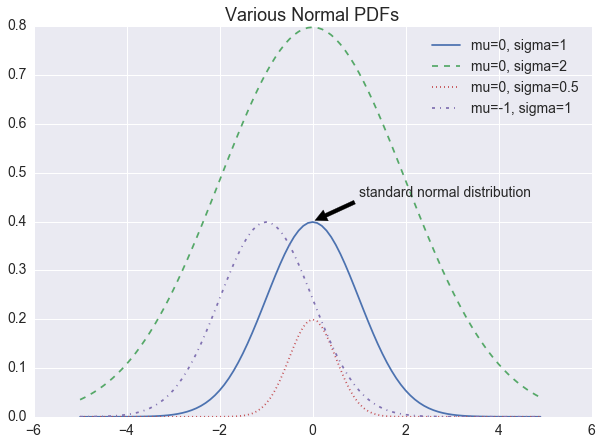

In [26]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.annotate('standard normal distribution', xy=(0, 0.4), xytext=(1, 0.45),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=14
            )
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend(loc='best')
plt.title("Various Normal PDFs")
plt.show()

The *cumulative distribution function (CDF)* for the normal distribution is written with help of the [*error function*](https://en.wikipedia.org/wiki/Error_function):
$$\operatorname{erf}(x) = \frac{2}{\sqrt\pi}\int_0^x e^{-t^2}\,\mathrm dt,$$
which gives the probability that a measurement, under the influence of normally distributed errors with standard deviation $\sigma$, has a distance less than $x$ from the mean value.  It is used in statistics to predict the behavior of any sample with respect to the mean population. 

In [18]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

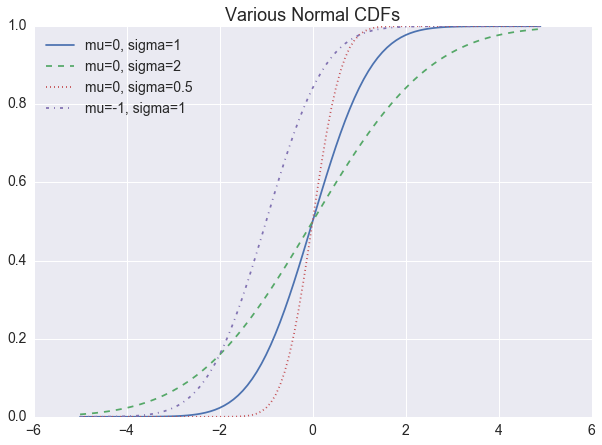

In [33]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x,sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x,sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x,sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x,mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend(loc='best')
plt.title("Various Normal CDFs")
plt.show()

In [29]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""
    
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0           # normal_cdf(-10) is (very close to) 0
    hi_z, hi_p   =  10.0, 1           # normal_cdf(10) is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2    # consider the midpoint
        mid_p = normal_cdf(mid_z)     # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break
            
    return mid_z

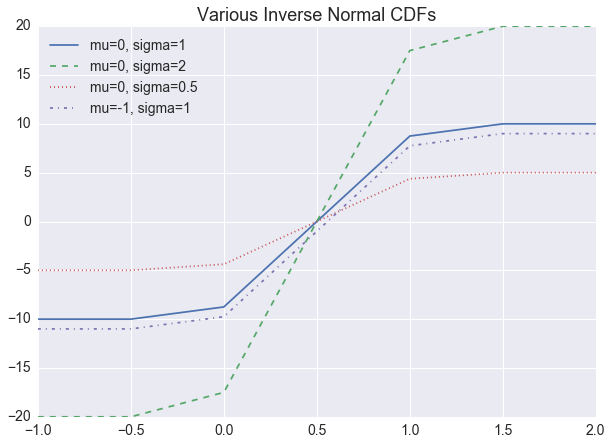

In [41]:
xs = np.arange(-1,2.5,0.5)
#sns.pointplot(xs, [uniform_cdf(x) for x in xs])
plt.plot(xs, [inverse_normal_cdf(x,sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [inverse_normal_cdf(x,sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [inverse_normal_cdf(x,sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [inverse_normal_cdf(x,mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend(loc='best')
plt.title("Various Inverse Normal CDFs")
plt.show()

## The Central Limit Theorem

$$\frac{1}{n}(x_1 + ... + x_n)$$

$$\frac{(x_1 + ... + x_n) - \mu\,n}{\sigma\sqrt{n}}$$

In [44]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

In [45]:
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    
    # user a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()], 
            [v / num_points for v in histogram.values()], 
            0.8, 
            color = '0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    # use line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

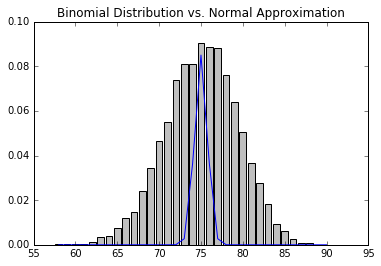

In [46]:
make_hist(0.75, 100, 10000)